# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import tensorflow

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization, Flatten, Activation, Dense, MaxPooling2D, AveragePooling2D
from keras.callbacks import EarlyStopping

from keras.datasets import cifar10

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')


Using TensorFlow backend.


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [2]:
type(cifar10)

module

In [0]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
print('shape for CIFAR10 train data-set are {} {}'.format(x_train.shape, y_train.shape))
print('shape for CIFAR10 train data-set are {} {}'.format(x_test.shape, y_test.shape))

shape for CIFAR10 train data-set are (50000, 32, 32, 3) (50000, 1)
shape for CIFAR10 train data-set are (10000, 32, 32, 3) (10000, 1)


In [5]:
print('unique labels in train data-set are',np.unique(y_train))
print('unique labels in test data-set are',np.unique(y_test))

unique labels in train data-set are [0 1 2 3 4 5 6 7 8 9]
unique labels in test data-set are [0 1 2 3 4 5 6 7 8 9]


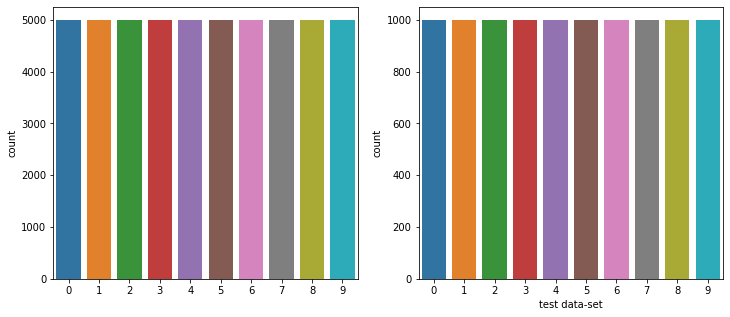

In [6]:
def cnt_plt(x, axes, x_label):
  sns.countplot(x, ax=axes)
  plt.xlabel(x_label)
  #plt.show()

fig, ax = plt.subplots(1,2,figsize=(12,5))
cnt_plt( np.reshape( y_train, (y_train.shape[0],) ) , ax[0], "train data-set")
cnt_plt( np.reshape( y_test, (y_test.shape[0],) ) , ax[1],  "test data-set")

plt.show()


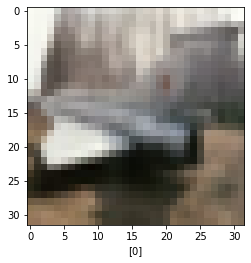

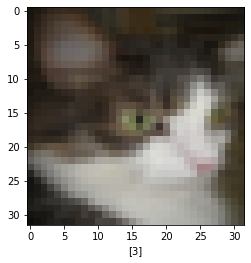

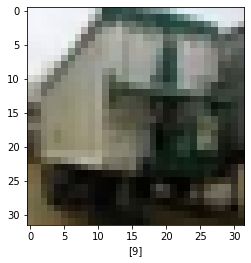

In [7]:
def dis_img(x_data, y_data):

  rnd_n = np.random.randint(low=0, high=x_data.shape[0],size=3)
  
  for idx in rnd_n:
    plt.imshow(x_train[idx])
    plt.xlabel(y_train[idx])
    plt.show()

dis_img(x_train,y_train)

In [8]:

y = np.reshape(y_train, (y_train.shape[0],))
cnn_x_train = x_train[y < 5]

cnn_y_train = y_train[y_train < 5]
print(np.unique(cnn_y_train))
print(cnn_x_train.shape)
print(cnn_y_train.shape)

[0 1 2 3 4]
(25000, 32, 32, 3)
(25000,)


In [9]:
y = np.reshape(y_test, (y_test.shape[0],))
cnn_x_test = x_test[y < 5]

cnn_y_test = y_test[y_test < 5]
print(np.unique(cnn_y_test))
print(cnn_x_test.shape)
print(cnn_y_test.shape)

[0 1 2 3 4]
(5000, 32, 32, 3)
(5000,)


### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
cnn_y_train = keras.utils.to_categorical(cnn_y_train,num_classes=5)
cnn_y_test = keras.utils.to_categorical(cnn_y_test,num_classes=5)


In [11]:
cnn_y_test.shape

(5000, 5)

In [12]:
cnn_y_test[0]

array([0., 0., 0., 1., 0.], dtype=float32)

In [0]:
cnn_x_train = cnn_x_train.astype(np.float32) / 255
cnn_x_test = cnn_x_test.astype(np.float32) / 255


### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [14]:
cnn_x_train = cnn_x_train.reshape(cnn_x_train.shape[0],32,32,3)
cnn_x_test = cnn_x_test.reshape(cnn_x_test.shape[0],32,32,3)
cnn_x_train.shape

(25000, 32, 32, 3)

In [0]:
i_shape = cnn_x_train.shape[1:]

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=cnn_x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

cb_es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)
m_his = model.fit(cnn_x_train, cnn_y_train, epochs=50,validation_split=0.20, callbacks=[cb_es])

# Score trained model.
scores = model.evaluate(cnn_x_test, cnn_y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         


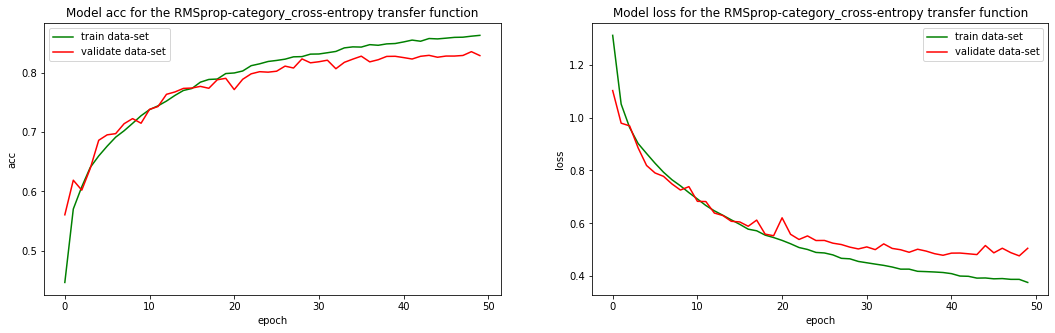

In [48]:
def plot_model_history(ax, history, train_metric, val_metric, actv_func ):
  ax.plot(history[train_metric], 'green',label='train data-set')
  ax.plot(history[val_metric], 'red',label='validate data-set')
  ax.set_title('Model {} for the {} transfer function'.format(train_metric,actv_func))
  ax.set_ylabel(train_metric)
  ax.set_xlabel('epoch')
  ax.legend()

fig, ax = plt.subplots(1, 2, figsize=(18,5))
plot_model_history(ax[0], m_his.history, 'acc', 'val_acc', 'RMSprop-category_cross-entropy')
plot_model_history(ax[1], m_his.history, 'loss', 'val_loss', 'RMSprop-category_cross-entropy')

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [18]:
# create the model for transfer learning
TL_model = Sequential()

# mark trainable parameters as false for conv layers being added from earlier build model 
for layer in model.layers:
  if ( 0 == layer.name.find('conv') ):
     layer.trainable = False

  TL_model.add(layer)

TL_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [19]:
y = np.reshape(y_train, (y_train.shape[0],))
TL_x_train = x_train[y >= 5]

TL_y_train = y_train[y_train >= 5]
print('\nTransfer learning Train data-set details')
print(np.unique(TL_y_train))
print(TL_x_train.shape)
print(TL_y_train.shape)

y = np.reshape(y_test, (y_test.shape[0],))
TL_x_test = x_test[y >= 5]

TL_y_test = y_test[y_test >= 5]
print('\nTransfer learning Test data-set details')
print(np.unique(TL_y_test))
print(TL_x_test.shape)
print(TL_y_test.shape)


Transfer learning Train data-set details
[5 6 7 8 9]
(25000, 32, 32, 3)
(25000,)

Transfer learning Test data-set details
[5 6 7 8 9]
(5000, 32, 32, 3)
(5000,)


In [20]:
TL_y_train = TL_y_train - 5 
TL_y_test = TL_y_test - 5

np.unique(TL_y_train)

array([0, 1, 2, 3, 4], dtype=uint8)

In [0]:
TL_y_train = keras.utils.to_categorical(TL_y_train,num_classes=5)
TL_y_test = keras.utils.to_categorical(TL_y_test,num_classes=5)

In [0]:
TL_x_train = TL_x_train.astype(np.float32) / 255
TL_x_test = TL_x_test.astype(np.float32) / 255

In [0]:
TL_x_train = TL_x_train.reshape(TL_x_train.shape[0],32,32,3)
TL_x_test = TL_x_test.reshape(TL_x_test.shape[0],32,32,3)


In [24]:
print('shape for transfer learning train data-set are{}{}'.format(TL_x_train.shape,TL_y_train.shape))
print('shape for transfer learning test data-set are{}{}'.format(TL_x_test.shape, TL_y_test.shape))

shape for transfer learning train data-set are(25000, 32, 32, 3)(25000, 5)
shape for transfer learning test data-set are(5000, 32, 32, 3)(5000, 5)


In [25]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
TL_model.compile(loss='categorical_crossentropy', optimizer=opt,  metrics=['accuracy'])

cb_es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)
tl_m_his = TL_model.fit(TL_x_train, TL_y_train, epochs=50,validation_split=0.20, callbacks=[cb_es])

# Score trained model.
scores = TL_model.evaluate(TL_x_test, TL_y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 20000 samples, validate on 5000 samples
Epoch 1/50
20000/20000 [==============================] - 48s 2ms/step - loss: 1.7677 - acc: 0.4106 - val_loss: 0.9426 - val_acc: 0.6940
Epoch 2/50
20000/20000 [==============================] - 47s 2ms/step - loss: 0.8584 - acc: 0.6941 - val_loss: 0.6882 - val_acc: 0.7640
Epoch 3/50
20000/20000 [==============================] - 49s 2ms/step - loss: 0.7032 - acc: 0.7452 - val_loss: 0.5904 - val_acc: 0.7956
Epoch 4/50
20000/20000 [==============================] - 47s 2ms/step - loss: 0.6310 - acc: 0.7706 - val_loss: 0.5450 - val_acc: 0.8088
Epoch 5/50
20000/20000 [==============================] - 49s 2ms/step - loss: 0.5911 - acc: 0.7853 - val_loss: 0.5136 - val_acc: 0.8190
Epoch 6/50
20000/20000 [==============================] - 47s 2ms/step - loss: 0.5599 - acc: 0.7946 - val_loss: 0.4906 - val_acc: 0.8266
Epoch 7/50
20000/20000 [==============================] - 47s 2ms/step - loss: 0.5352 - acc: 0.8084 - val_loss: 0.4780 - val_acc:

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [0]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [29]:
print(twenty_train.target.ndim)
print(twenty_train.target.shape)

1
(2257,)


### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

In [31]:
print(twenty_test.target.ndim)
print(twenty_test.target.shape)

1
(1502,)


###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [32]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [33]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [34]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

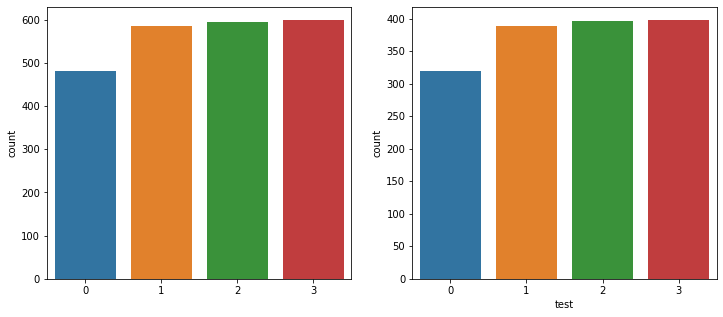

In [35]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
cnt_plt(twenty_train.target, ax[0],'train')
cnt_plt(twenty_test.target, ax[1], 'test')


### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [36]:
print(twenty_train.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [0]:
# instantiate the vectorizer
vect = TfidfVectorizer(strip_accents='ascii', stop_words='english', ngram_range = (1,2), min_df = 2, max_features=9000 )

# learn training data vocabulary, then use it to create a document-term matrix
x_train_dtm  =  vect.fit_transform(twenty_train.data)

In [38]:
print('train DTM shape{}'.format(x_train_dtm.shape))


train DTM shape(2257, 9000)


In [39]:
vect.get_feature_names()[:10]


['00',
 '00 08',
 '00 gmt',
 '000',
 '000 000',
 '00pm',
 '01',
 '01 09',
 '01 10',
 '01 11']

In [0]:
# transform testing data into a document-term matrix
x_test_dtm = vect.transform(twenty_test.data)

In [41]:
print('test DTM shape{}'.format(x_test_dtm.shape))

test DTM shape(1502, 9000)


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [0]:
# instantiate a logistic regression model
logreg = LogisticRegression()

In [43]:
# train the model using X_train_dtm
logreg.fit(x_train_dtm, twenty_train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# make class predictions for X_test_dtm
lr_y_pred = logreg.predict(x_test_dtm)

In [45]:
metrics.confusion_matrix(twenty_test.target, lr_y_pred)

array([[250,  14,  18,  37],
       [  3, 375,   8,   3],
       [  6,  28, 358,   4],
       [  4,   9,   2, 383]])

In [46]:
# calculate accuracy of class predictions
metrics.accuracy_score(twenty_test.target, lr_y_pred)

0.9094540612516645